<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#使用-PageRank-算法" data-toc-modified-id="使用-PageRank-算法-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>使用 PageRank 算法</a></span></li><li><span><a href="#希拉里邮件-&amp;-可视化" data-toc-modified-id="希拉里邮件-&amp;-可视化-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>希拉里邮件 &amp; 可视化</a></span></li><li><span><a href="#总结" data-toc-modified-id="总结-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>总结</a></span></li><li><span><a href="#练习" data-toc-modified-id="练习-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>练习</a></span></li></ul></div>

1. 如何使用工具完成 PageRank 算法；
1. 如何使用 PageRank 算法来实际分析希拉里 9306 封邮件；
1. 如何对创建好的网络图进行可视化。

## 使用 PageRank 算法

In [3]:
import networkx as nx

G = nx.DiGraph()

edges = [("A", "B"), ("A", "C"), ("A", "D"), ("B", "D"),
         ("C", "A"), ("D", "B"), ("D", "C")]

for edge in edges:
    G.add_edge(edge[0], edge[1])
    
pagerank_list = nx.pagerank(G, alpha=1)
print("pageran 值是：", pagerank_list)

pageran 值是： {'A': 0.2307687769017701, 'B': 0.23076958872321107, 'C': 0.23076958872321107, 'D': 0.30769204565180697}


1. 关于图的创建：
    - 无向图：nx.Graph()
    - 有向图：nx.DiGraph()
1. 关于节点的增加、删除和查询：
    - 增加：G.add_node("A")  \  G.add_nodes_from(["B","C"])
    - 删除：G.remove_node("A")   \  G.remove_nodes_from(["A", "B"])
    - 查询：G.nodes()   \  G.number_of_nudes()
1. 关于边的增加、删除和查询：
    - 增加：G.add_edge("A", "B")  \  G.add_edge_from([u,v,w]) （u、v、w：起点、终点、权重）
    - 删除：G.remove_edge()  \  G.remove_edges_from()
    - 查询：G.edges()  \  G.number_of_edges()

## 希拉里邮件 & 可视化

流程：

<img src="https://static001.geekbang.org/resource/image/72/c9/72132ffbc1209301f0876178c75927c9.jpg" style="width:500px">

1. 数据清洗：别名统一转换成正式名。

1. 特征选择：只考虑邮件的发送者和接受者，即 MetadataFrom 和 MetadataTo 两个字段作为特征值。同时，往来邮件次数越多，代表该边的权重越高。

1. 挖掘阶段：筛选出 PR 值高的人物；以节点大小来表示 PR 值得大小。

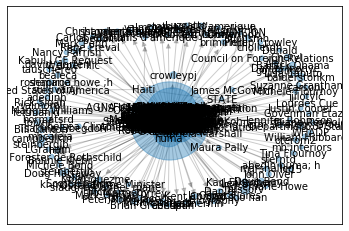

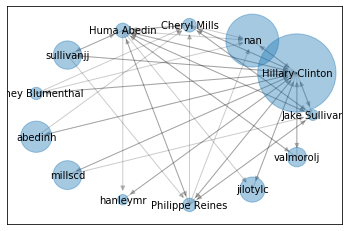

In [17]:
import pandas as pd
import numpy as np
import networkx as nx
from collections import defaultdict
import matplotlib.pyplot as plt

emails = pd.read_csv("./datasets/Emails.csv")

file = pd.read_csv("./datasets/Aliases.csv")
aliases = {}
for index, row in file.iterrows():
    aliases[row['Alias']] = row['PersonId']


file = pd.read_csv("./datasets/Persons.csv")
persons = {}
for index, row in file.iterrows():
    persons[row["Id"]] = row['Name']


def unify_name(name):
    name = str(name).lower()

    name = name.replace(",", "").split("@")[0]

    if name in aliases.keys():
        return persons[aliases[name]]
    return name


def show_graph(graph, layout='spring_layout'):
    if layout == 'circular_layout':
        positions = nx.circular_layout(graph)
    else:
        positions = nx.spring_layout(graph)

    nodesize = [x['pagerank']*20000 for v, x in graph.nodes(data=True)]

    edgesize = [np.sqrt(e[2]['weight']) for e in graph.edges(data=True)]

    nx.draw_networkx_nodes(graph, positions, node_size=nodesize, alpha=0.4)

    nx.draw_networkx_edges(graph, positions, edge_size=edgesize, alpha=0.2)

    nx.draw_networkx_labels(graph, positions, font_size=10)

    plt.show()


emails.MetadataFrom = emails.MetadataFrom.apply(unify_name)
emails.MetadataTo = emails.MetadataTo.apply(unify_name)

edges_weights_temp = defaultdict(list)
for row in zip(emails.MetadataFrom, emails.MetadataTo, emails.RawText):
    temp = (row[0], row[1])
    if temp not in edges_weights_temp:
        edges_weights_temp[temp] = 1
    else:
        edges_weights_temp[temp] = edges_weights_temp[temp] + 1

edges_weights = [(key[0], key[1], val)
                 for key, val in edges_weights_temp.items()]

graph = nx.DiGraph()

graph.add_weighted_edges_from(edges_weights)

pagerank = nx.pagerank(graph)

nx.set_node_attributes(graph, name="pagerank", values=pagerank)

show_graph(graph)


# 筛选 PR 值
pagerank_threshold = 0.005

small_graph = graph.copy()

for n, p_rank in graph.nodes(data=True):
    if p_rank['pagerank'] < pagerank_threshold:
        small_graph.remove_node(n)

show_graph(small_graph, 'circular_layout')

## 总结

实战中，往往就是一行代码的事。但是如上诉代码，数据清洗和特征选择往往占据大多数时间。

![](https://static001.geekbang.org/resource/image/30/42/307055050e005ba5092028a074a5c142.png)

## 练习

假设用户有 15% 的跳转率，编写代码重新计算 A、B、C、D 四个节点的 PR 值。

In [16]:
import networkx

digraph = networkx.DiGraph()

edges = [("A", "B"), ("A", "C"), ("A", "D"), ("B", "A"),
         ("B", "D"), ("C", "A"), ("D", "B"), ("D", "C")]

for edge in edges:
    digraph.add_edge(edge[0], edge[1])

pagerank_list = networkx.pagerank(digraph)

print('PageRank 值是：', pagerank_list)

PageRank 值是： {'A': 0.3245609358176831, 'B': 0.22514635472743894, 'C': 0.22514635472743894, 'D': 0.22514635472743894}
